In [1]:
# import SMRT modules
from smrt import make_snowpack, make_model, sensor_list

# import plotting modules
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


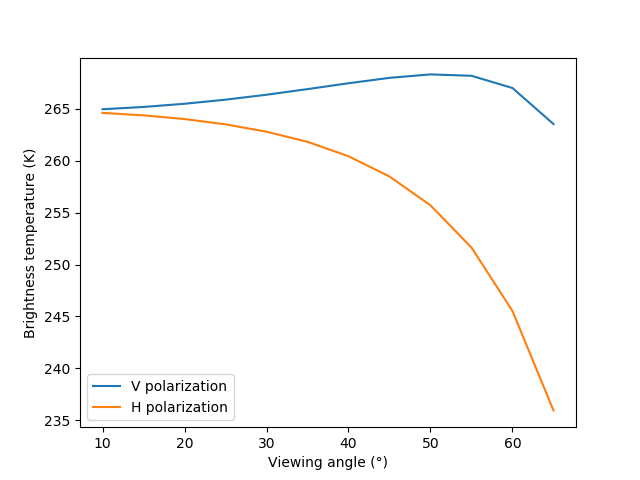

In [2]:
# prepare inputs for 1 layer
thickness = [100]  # very large = semi-infinite
corr_length = [50e-6]
temperature = [270]
density = [320]

# create the snowpack
snowpack = make_snowpack(thickness=thickness,
                         microstructure_model="exponential",
                         density=density,
                         temperature=temperature,
                         corr_length=corr_length)

# create the sensor
theta_range = range(10, 70, 5)
radiometer = sensor_list.passive(37e9, theta_range)

# create the model
m = make_model("iba", "dort")

# run the model
result = m.run(radiometer, snowpack)

# plot
plt.figure()
plt.plot(theta_range, result.TbV(), label='V polarization')
plt.plot(theta_range, result.TbH(), label='H polarization')
plt.xlabel('Viewing angle (°)')
plt.ylabel('Brightness temperature (K)')
plt.legend()
